In [1]:
pip install opencv-python


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
print("Current working directory:", os.getcwd())
print("Does the Training folder exist?",
      os.path.exists(r"C:\Users\temisola\DMML-Dubai-UG-Group-2\Datasets\raw\image_data\main_image_dataset\Testing\glioma"))


Current working directory: c:\Users\temisola\DMML-Dubai-UG-Group-2\notebooks
Does the Training folder exist? True


In [3]:
import os, cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random

In [4]:

# Define directories
raw_dir = r"C:\Users\temisola\DMML-Dubai-UG-Group-2\Datasets\raw\image_data\main_image_dataset"
train_dir = os.path.join(raw_dir, "Training")
test_dir = os.path.join(raw_dir, "Testing")
clean_dir = "Datasets/processed/cleaned_images"

#Create output directory if it doesn't exist
os.makedirs(clean_dir, exist_ok=True)
os.makedirs(f"{clean_dir}/Training", exist_ok=True)
os.makedirs(f"{clean_dir}/Testing", exist_ok=True)


IMG_SIZE = (128, 128)
categories = ['glioma', 'meningioma', 'pituitary', 'notumor']

#method to clean and resize images
def clean_and_resize(src_folder, dest_folder):
    for category in categories:
        src_path = os.path.join(src_folder, category)
        dest_path = os.path.join(dest_folder, category)
        os.makedirs(dest_path, exist_ok=True)

        for img_name in tqdm(os.listdir(src_path), desc=f"Cleaning {category}"):
            img_path = os.path.join(src_path, img_name)
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, IMG_SIZE)
                    cv2.imwrite(os.path.join(dest_path, img_name), img)
            except Exception as e:
                print(f"Error: {e} on {img_name}")

# Clean both Training and Testing
clean_and_resize(train_dir, f"{clean_dir}/Training")
clean_and_resize(test_dir, f"{clean_dir}/Testing")

print("Image cleaning complete.")

Cleaning glioma:  62%|██████▏   | 823/1321 [00:04<00:02, 173.74it/s]


KeyboardInterrupt: 

In [20]:

clean_dir = r"C:\Users\temisola\DMML-Dubai-UG-Group-2\Datasets\processed\Image_data\Training"
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

C:\Users\temisola\AppData\Local\Temp\ipykernel_29108\380262389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")


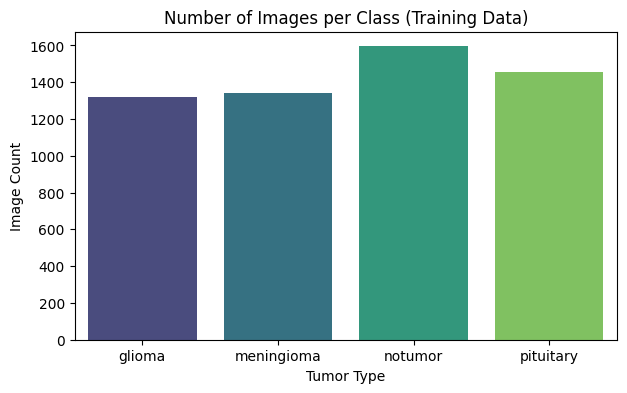

In [ ]:
#visualize how many images are in each class
counts = {cls: len(os.listdir(os.path.join(clean_dir, cls))) for cls in categories}

plt.figure(figsize=(7,4))
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")
plt.title("Number of Images per Class (Training Data)")
plt.xlabel("Tumor Type")
plt.ylabel("Image Count")
plt.show()

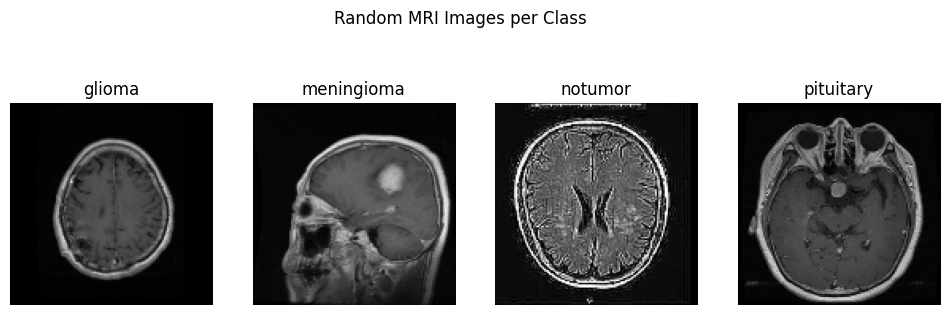

In [22]:
#Visual inspection of random samples
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i, cls in enumerate(categories):
    path = os.path.join(clean_dir, cls)
    sample = random.choice(os.listdir(path))
    img = cv2.imread(os.path.join(path, sample))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].set_title(cls)
    axes[i].axis("off")
plt.suptitle("Random MRI Images per Class")
plt.show()


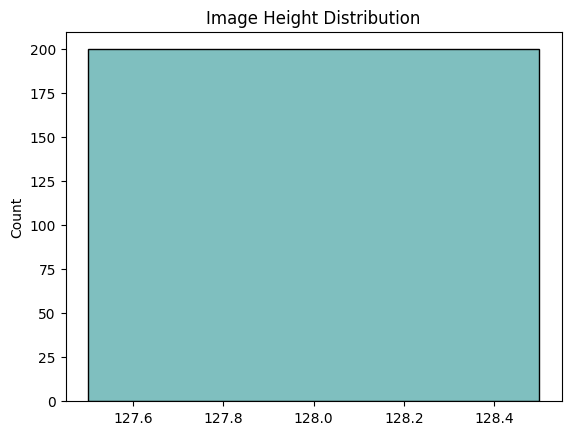

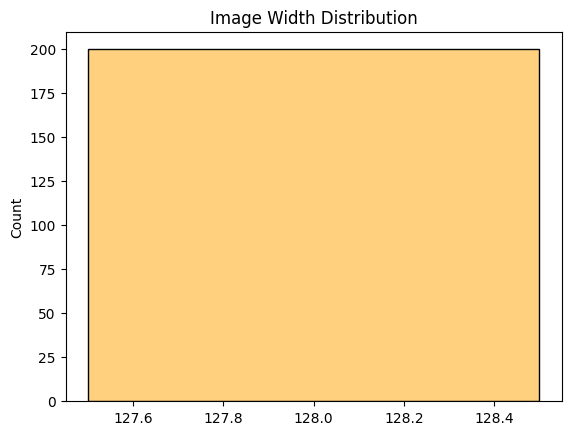

In [23]:
#Check if cleaned images are uniform (and explore pixel intensity).

heights, widths = [], []
for cls in categories:
    path = os.path.join(clean_dir, cls)
    for img_name in random.sample(os.listdir(path), 50):  # sample 50 images
        img = cv2.imread(os.path.join(path, img_name))
        h, w, _ = img.shape
        heights.append(h)
        widths.append(w)

sns.histplot(heights, kde=True, color="teal")
plt.title("Image Height Distribution")
plt.show()

sns.histplot(widths, kde=True, color="orange")
plt.title("Image Width Distribution")
plt.show()


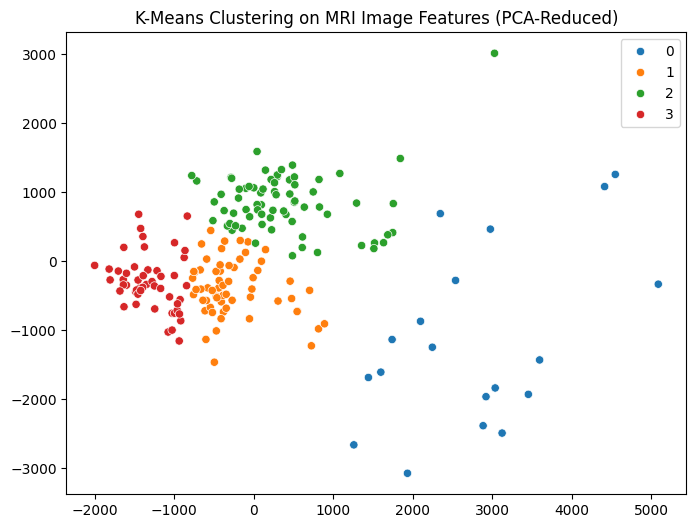

In [24]:
#This gives a visual representation of natural groupings in the data.

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Flatten small random sample
sample_imgs, sample_labels = [], []
for cls in categories:
    path = os.path.join(clean_dir, cls)
    for img_name in random.sample(os.listdir(path), 50):
        img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64)).flatten()
        sample_imgs.append(img)
        sample_labels.append(cls)

sample_imgs = np.array(sample_imgs)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(sample_imgs)

# Cluster
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="tab10")
plt.title("K-Means Clustering on MRI Image Features (PCA-Reduced)")
plt.show()
